# **Project Name:- Deep Facial Emotion Recognation Project**

## **Name :- Asit Atmaram More**

## **Dataset Overview — Face Emotion Recognition**
* Image Size: 48×48 pixels

* Color Mode: Grayscale

* Preprocessing: Faces are centered and scaled to occupy a similar space in each image.

### **Task:-**
#### **Classify facial expressions into one of seven categories:**

* Angry

* Disgust

* Fear

* Happy

* Sad

* Surprise

* Neutral

### **Dataset Split:-**
* Training Set: 28,709 images

* Validation Set: 7,178 images

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,BatchNormalization
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [27]:
# Setting the dimensions and batch size for Image
img_width, img_height = 48, 48
batch_size = 128
input_shape = (img_width, img_height, 1)

In [28]:
input_shape

(48, 48, 1)

In [29]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [30]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [31]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [32]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [33]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [34]:
from tqdm.notebook import tqdm

#### **Feature Extraction:-**

In [35]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        # ✅ Correct way to load grayscale images with fixed size
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [36]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [37]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [38]:
x_train = train_features/255.0
x_test = test_features/255.0

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

#### **Data Preprocessing:-**

In [41]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [42]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

#### **Model Architecture:-**

In [43]:
model = Sequential()
# convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 categories

C:\Users\Asit\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(28821, 48, 48, 1)
(28821, 7)
(7066, 48, 48, 1)
(7066, 7)


In [46]:
print(np.unique(y_train))
print(y_train.shape)


[0. 1.]
(28821, 7)


In [47]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))


28821
28821
7066
7066


In [48]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )



In [91]:
history=model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 50, validation_data = (x_test,y_test)) 


Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 64s 281ms/step - accuracy: 0.8510 - loss: 0.4030 - val_accuracy: 0.6326 - val_loss: 1.4024
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 63s 279ms/step - accuracy: 0.8519 - loss: 0.3955 - val_accuracy: 0.6332 - val_loss: 1.4534
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 64s 282ms/step - accuracy: 0.8588 - loss: 0.3843 - val_accuracy: 0.6265 - val_loss: 1.2825
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 64s 283ms/step - accuracy: 0.8616 - loss: 0.3798 - val_accuracy: 0.6165 - val_loss: 1.4880
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 64s 281ms/step - accuracy: 0.8605 - loss: 0.3790 - val_accuracy: 0.6327 - val_loss: 1.5322
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 64s 281ms/step - accuracy: 0.8667 - loss: 0.3749 - val_accuracy: 0.6231 - val_loss: 1.4188
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 64s 282ms/step - accuracy: 0.8663 - loss: 0.3655 - val_accuracy: 0.6094 - val_loss: 1.3835
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 63s 280ms/step - accuracy: 0.8732 - loss: 0

#### **Accuracy over Epochs graph plt:-**

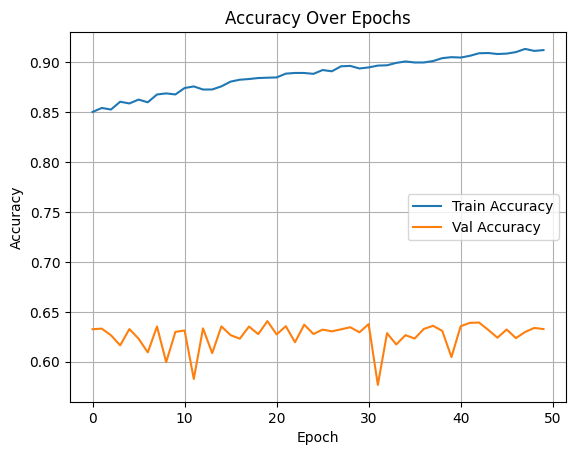

In [92]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,416,343 (28.29 MB)

 Trainable params: 2,471,815 (9.43 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,943,632 (18.86 MB)

## ✅ Key Points
* 3 convolutional blocks with increasing filters: 64 → 128 → 256

* BatchNormalization + MaxPooling + Dropout after each block

* Fully connected layers after flattening

* Final Dense layer (7 neurons) with Softmax for emotion classification



* The model uses three blocks of Conv2D → BatchNorm → MaxPooling → Dropout

* It flattens the feature maps and uses two fully connected (Dense) layers

* Dropout is strategically applied throughout the network to avoid overfitting

* Batch Normalization improves training speed and stability

#### Model saved in H5 format

In [1]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")


NameError: name 'model' is not defined

#### Prediction with respect to their label

In [96]:
from keras.models import model_from_json


In [97]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [98]:
def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [99]:
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/test/sad/350.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model prediction is  sad


Original image is of: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Model prediction: sad (100.00%)


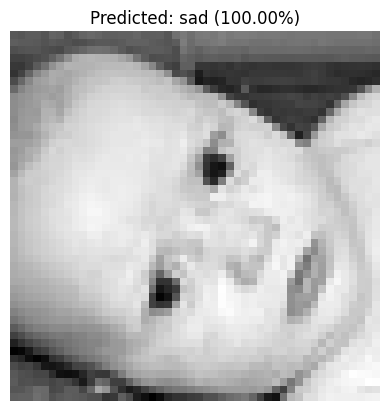

In [109]:
# Assuming model, ef, and label are already defined
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/train/sad/170.jpg'
print("Original image is of: sad")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

Original image is of: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Model prediction: surprise (84.89%)


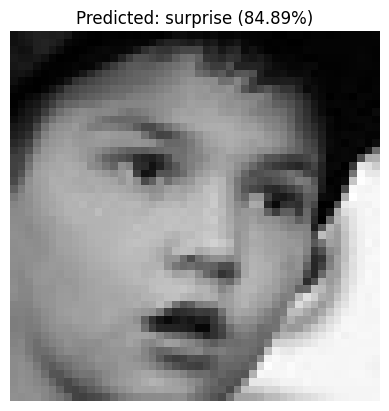

In [113]:
# Path to the image
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/test/fear/101.jpg'
print("Original image is of: fear")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

Original image is of: disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Model prediction: disgust (79.01%)


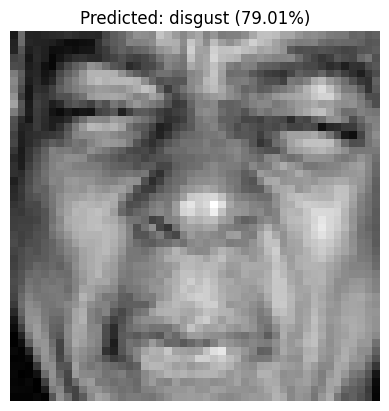

In [114]:
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/test/disgust/10435.jpg'
print("Original image is of: disgust")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

Original image is of: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction: happy (100.00%)


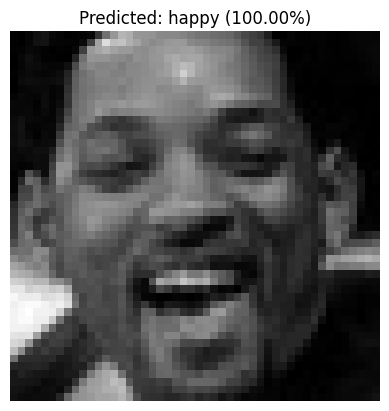

In [115]:
# Path to the image
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/test/happy/187.jpg'
print("Original image is of: happy")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

Original image is of: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction: surprise (100.00%)


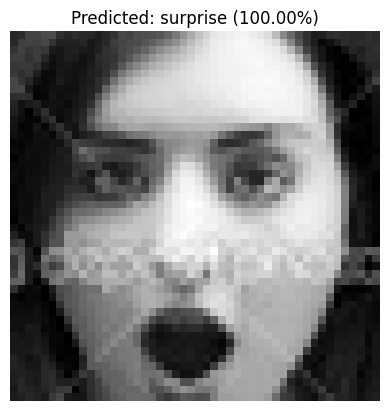

In [116]:
# Path to the image
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/test/surprise/1914.jpg'
print("Original image is of: surprise")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

Original image is of: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Model prediction: surprise (100.00%)


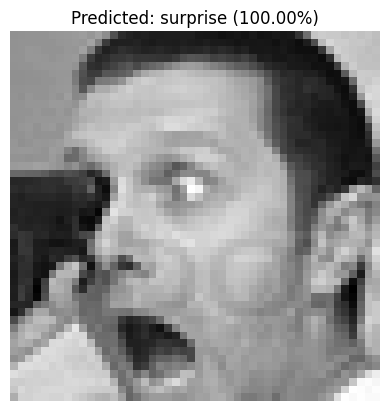

In [119]:
# Path to the image
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/train/surprise/357.jpg'
print("Original image is of: surprise")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

Original image is of: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model prediction: neutral (91.11%)


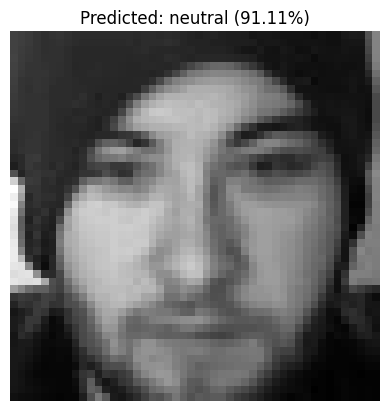

In [120]:
# Path to the image
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/train/neutral/136.jpg'
print("Original image is of: neutral")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

Original image is of: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model prediction: angry (99.94%)


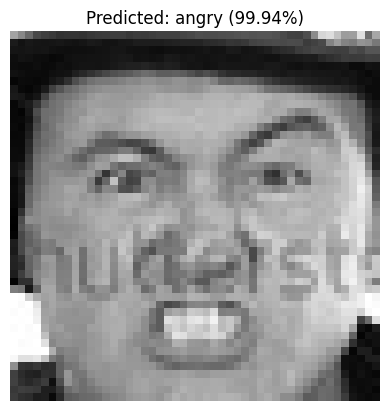

In [122]:
# Path to the image
image = 'D:/Misc/Labmentix Internship/Project 3/Face Emotion Recognition Dataset_2/images/train/angry/76.jpg'
print("Original image is of: angry")

# Preprocess the image
img = ef(image)

# Predict using the model
pred = model.predict(img)

# Get predicted label and confidence
pred_label = label[pred.argmax()]
confidence = pred.max() * 100

print(f"Model prediction: {pred_label} ({confidence:.2f}%)")

# Display the image with predicted label and confidence
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label} ({confidence:.2f}%)')
plt.axis('off')
plt.show()

# DeepFERResult Summary :-

Above 7 Image Sample Tests shows Prediction of 7 Classes/Emotions . Each result consists of original image Label ,EmotionModel prediction label with Sample image.

# Result Summary:-

   ## Image Predictions Observations:-
   1. Sad:-Correctly predicted as Sad with Prediction Confidence as **100.00%**
   2. Fear:-Falsely predicted as surprise as both Fear and Surprise clases may have similarityand the confidence of surprise is **84.89%**.
   3. Disgust:-Correctly predicted as Disgust with Prediction Confidence as **79.01%**.
   4. Happy:-Correctly predicted as Happy with Prediction Confidence as **100.00%**.
   5. Surprise:-Correctly predicted as Surprise with Prediction Confidence as **100.00%**.
   6. Neutral:-Correctly predicted as Neutral with Prediction Confidence as **91.11%**.
   7. Angry:-Correctly predicted as Angry with Prediction Confidence as **99.94**.

* According to model the Accuracy of the mode for Facial Emotion Recognation is **91.21%** which efficiently predicts for classes Sad,Happy,Angry and Neutral.
* For clasess Fear and Surprise it is complex to predict but still suprise is predicted efficiently.
* For Disgust it predicts avegragely but satisfactory.
  Above obesrvation describes that model predicts Emotions/Classes Effectively.
  